# Run of Cropnet new attention model applying on breast cancer dataset
dataset: Breast Histopathology Images. 
https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images?datasetId=7415. 
Model: A 2nd version of light attention model designed for crop disease identification. 
from paper: 
Automatic identification of commodity label images using lightweight attention network, 
from Group of Prof Defu Zhang @ Xiamen University. DOI:doi.org/10.1007/s00521-021-06081-9

In [1]:
##在kaggle中建立工作目录
import os
os.makedirs('../working/data/train_seg/idc-minus/')     
os.makedirs('../working/data/train_seg/idc-plus/')  
os.makedirs('../working/data/test_seg/idc-minus/')     
os.makedirs('../working/data/test_seg/idc-plus/')  
os.makedirs('../working/data/val_seg/idc-minus/')     
os.makedirs('../working/data/val_seg/idc-plus/')  


In [2]:
##全局变量声明
sampling_seed = 0
size_4_training = 1000
img_x = 224
batch_size = 32
epochs = 30
n_of_classes=2
#training_reshape=(-1, img_size, img_size, 3)

In [3]:
import numpy as np
import random
from sklearn.model_selection import train_test_split

import shutil
from glob import glob 
#make directory for labelling

train_dir='../working/data/train_seg/'
validation_dir='../working/data/val_seg/' 
test_dir = '../working/data/test_seg/'  

class0 = [] # 0 = idc+
class1 = [] # 1 = idc-
imagePatches = glob('../input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True)
for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

print(class0[0:10])

#sampling 10000 images from class 0 and class 1 to train the model
##从每类文件名列表中抽样
random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class0label=np.zeros(size_4_training)
class1sample=random.sample(class1,size_4_training)
class1label=np.ones(size_4_training)
##从每类样本列表中分割train-val-test
class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val,class0sample_test, class0label_val,  class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val,class1sample_test, class1label_val ,  class1label_test= train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
##函数功能：将之前文件列表中的文件复制到指定工作目录中
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            # print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
##分别按照每类，train， validation， test保存样本   
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)
##print输出包含两类train，valid，test的大小和每次转存的文件用于检查

['../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y501_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1501_y1101_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x451_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x801_y451_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x151_y1051_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x1351_y901_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x701_y651_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/10295/0/10295_idx5_x951_y1401_class0.png', '../input/breast-histopathology-images/IDC_regular_ps50_idx5/102

In [4]:
# sampling 10000 images from class 0 and class 1 to train the model
##从每类文件名列表中抽样
random.seed(sampling_seed)
class0sample=random.sample(class0,size_4_training)
class0label=np.zeros(size_4_training)
class1sample=random.sample(class1,size_4_training)
class1label=np.ones(size_4_training)
##从每类样本列表中分割train-val-test
class0sample_train, class0sample_test1, class0label_train, class0label_test1 = train_test_split(class0sample, class0label, test_size=0.3, random_state=42)
class0sample_val, class0sample_test, class0label_val,  class0label_test = train_test_split(class0sample_test1, class0label_test1, test_size=0.3, random_state=42)
print(len(class0sample_train))
print(len(class0sample_test))
print(len(class0sample_val))
class1sample_train, class1sample_test1, class1label_train, class1label_test1 = train_test_split(class1sample, class1label, test_size=0.3, random_state=42)
class1sample_val, class1sample_test, class1label_val,  class1label_test = train_test_split(class1sample_test1, class1label_test1, test_size=0.3, random_state=42)
print(len(class1sample_train))
print(len(class1sample_test))
print(len(class1sample_val))
##函数功能：将之前文件列表中的文件复制到指定工作目录中
def read_and_save_data(path, file_name_array):
    j=0
    for i in file_name_array:
        if i.endswith('.png'):
          
            
            #second copy method
            head, tail = os.path.split(i)
            outputname=str(path+tail)
            #outputname=str(path+str(j)+'.png')
            # print(outputname)
            shutil.copy(i, outputname)
   
            #print(status2)
            
            j=j+1
            if j==120000:
                break
            
##分别按照每类，train， validation， test保存样本   
class0train_path='../working/data/train_seg/idc-minus/'
class1train_path='../working/data/train_seg/idc-plus/'
class0test_path='../working/data/test_seg/idc-minus/'
class1test_path='../working/data/test_seg/idc-plus/'
class0val_path='../working/data/val_seg/idc-minus/'
class1val_path='../working/data/val_seg/idc-plus/'

read_and_save_data(class0train_path,class0sample_train)
read_and_save_data(class1train_path,class1sample_train)


read_and_save_data(class0test_path,class0sample_test)
read_and_save_data(class1test_path,class1sample_test)


read_and_save_data(class0val_path,class0sample_val)
read_and_save_data(class1val_path,class1sample_val)
##print输出包含两类train，valid，test的大小和每次转存的文件用于检查

140
42
18
140
42
18


In [5]:
##这个模块（cell）把之前存好的每类train-valid-test文件分别读到np。array里
##这个模块在其他模型上进行过测试，也没有问题
import os
import cv2
##函数功能，将指定目录path下的文件读到列表中，并按给定的tag创建
#输入path目标目录，tag目录内所有文件的label（目录内全部一致）
#输出image_data，进行过resize的图片数据array
#输出label，标签列表，列表内每一个数字都是tag，列表大小等于目录内图片数量
def readImage(path, tag):
    j=0
    image_data = []
    label=[]
    for i in os.listdir(path):
        imgname=path+i
        #print(imgname)
        img = cv2.imread(imgname, cv2.IMREAD_COLOR)
        img_resized = cv2.resize(img, (img_x,img_x), interpolation=cv2.INTER_LINEAR)
        image_data.append(img_resized)
        label.append(tag)
        #print(img[1])
        j=j+1
        #if j==10:
        #    break
        
    return image_data, label

import numpy as np
from tensorflow.keras.utils import *
from sklearn.utils import shuffle

class0_train, train0_label = readImage(class0train_path, 0)
class1_train, train1_label  = readImage(class1train_path, 1)
class0_test, test0_label = readImage(class0test_path, 0)
class1_test, test1_label = readImage(class1test_path, 1)
class0_val, val0_label = readImage(class0val_path, 0)
class1_val, val1_label = readImage(class1val_path, 1)
##函数功能，将每类train的图片数据列表和标签列表进行混合并洗牌，或者是validation，或者是test
#class0array，class1array，是train（或valid，或test） 中class0，class1的图片数据列表，label0，label1是标签列表，比如说class0是一个（700，224，224，3）的数据array，700就是图片张数，224是xy尺寸，3是三原色对应的通道。label0就是长度为700，每位都是0的array
#输出中combined_data, combined_label分别是混合并洗牌后的数据和标签。混合通过np。concatenate，洗牌通过shuffle函数，并且combined_label标签进行了hot-coded二进制转换,通过to_categorical函数实现
#函数中包含print检查功能，先显示combined_label的array 的shape，再整个print combined_label，以检查label是否成功二进制化，是否完全平衡
#输出label，标签列表，列表内每一个数字都是tag，列表大小等于目录内图片数量
def Image_array_process(class0array,label0, class1array, label1):
    class0_array=np.array(class0array)
    class1_array=np.array(class1array)
    combined_data = np.concatenate((class0_array, class1_array))
    combined_label= np.concatenate((label0,label1), axis=0)
    assert len(combined_data) == len(combined_label)
    combined_data, combined_label = shuffle(combined_data, combined_label, random_state=0)
    print(combined_data.shape)
    length=len(combined_data)
    #combined_label=to_categorical(combined_label,num_classes=2)
    #combined_label=np.array(combined_label,dtype=np.int64)
    #combined_data=np.array(combined_data,dtype=np.int64

    #print(class0_array.shape)
    #print(combined_data.shape)
    '''
    training_reshape=(img_x,img_x,3)
    length=len(combined_data)
    print(length)
    x =[None]*length
    #print(img_data.type)
    y =np.zeros(length)
    i=0
   
    for features,label in combined_data:
        x[i]=features
        #print(x.shape)
        y[i]=label
        #print(y[i])
        i=i+1
    
            #x = np.array(x).reshape(training_reshape)
    x = np.array(x)    
    #print(x.shape)
    #y=np.array(y)
    y=y.astype(int)
    y = to_categorical(y)
    print(y)
    '''  
    return combined_data, combined_label


X_train, y_train=Image_array_process(class0_train, train0_label, class1_train, train1_label)
X_test, y_test=Image_array_process(class0_test, test0_label, class1_test, test1_label)
X_val, y_val=Image_array_process(class0_val, val0_label, class1_val, val1_label)


(280, 224, 224, 3)
(120, 224, 224, 3)
(120, 224, 224, 3)


In [6]:
train_data=X_train
train_label=y_train

test_data=X_test
test_label=y_test

val_data=X_val
val_label=y_val

In [7]:
print(len(train_data))

280


In [8]:
import tensorflow as tf
from keras import backend as K
from keras import optimizers
from tensorflow.keras.optimizers import Adam
#import keras.backend.tensorflow_backend as KTF
from tensorflow.python.keras.backend import get_session
import glob
from keras.layers import Input,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,concatenate,Activation,ZeroPadding2D
import numpy as np
import pandas as pd
import keras 
from keras.models import load_model
from keras.layers import Activation, Dense
from matplotlib import pyplot as plt
from skimage import io,data
import time
#from keras import layers
#from keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow import keras 
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [21]:
now = time.strftime("%Y-%m-%d_%H-%M-%S", time.localtime())

MODEL_INIT = '/kaggle/working/log/init_model.h5'
MODEL_PATH = '/kaggle/working/log/test_model.h5'
board_name1 = './stage1/' + now + '/'
board_name2 = './stage2/' + now + '/'
train_dir='/data/train_seg/'
validation_dir='/data/test_seg/'
img_size = (img_x, img_x)  # 图片大小

In [10]:
##添加自定义层
import tensorflow as tf 

def focal_loss(gamma=2.):            
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        return -K.sum( K.pow(1. - pt_1, gamma) * K.log(pt_1)) 
    return focal_loss_fixed


def Conv2d_BN(x, nb_filter,kernel_size, strides=(1,1), padding='same',name=None):  
    if name is not None:  
        bn_name = name + '_bn'  
        conv_name = name + '_conv'  
    else:  
        bn_name = None  
        conv_name = None  
  
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)  
    x = BatchNormalization(axis=3,name=bn_name)(x)  
    return x  

def Conv_Block(inpt,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut=False):  
    x = Conv2d_BN(inpt,nb_filter=nb_filter[0],kernel_size=(1,1),strides=strides,padding='same')  
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3,3), padding='same')  
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1,1), padding='same')  
    if with_conv_shortcut:  
        shortcut = Conv2d_BN(inpt,nb_filter=nb_filter[2],strides=strides,kernel_size=kernel_size)  
        x = add([x,shortcut])  
        return x  
    else:  
        x = add([x,inpt])  
        return x  

'''
##原文类，运行报错，StackOverflow推荐添加get_config
class SeBlock(keras.layers.Layer):   
    def __init__(self, reduction=4,**kwargs):
        super(SeBlock,self).__init__(**kwargs)
        self.reduction = reduction
'''
class SeBlock(keras.layers.Layer):   
    def __init__(self, reduction=4,**kwargs):
        super(SeBlock,self).__init__(**kwargs)
        self.reduction = reduction
    def get_config(self):
        config = super().get_config().copy()
        config.update({'reduction': self.reduction})
        return config
        
    def build(self,input_shape):
    	#input_shape     
    	pass
    def call(self, inputs):
        x = keras.layers.GlobalAveragePooling2D()(inputs)
        x = keras.layers.Dense(int(x.shape[-1]) // self.reduction, use_bias=False,activation=keras.activations.relu)(x)
        x = keras.layers.Dense(int(inputs.shape[-1]), use_bias=False,activation=keras.activations.hard_sigmoid)(x)
        return keras.layers.Multiply()([inputs,x])    
        #return inputs*x 

#------#MS-DenseNet----------------------------------
def get_bottlenet(image_size,alpha=1.0):
    inputs = keras.layers.Input(shape=(image_size,image_size,3),name='input_1')
    net = keras.layers.ZeroPadding2D(padding=(3,3),name='zero_padding2d_1')(inputs)
    net = keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=(2,2),
                             padding='valid', name='conv1/conv')(net)
    net = keras.layers.BatchNormalization(name='conv1/bn')(net)
    net = keras.layers.ReLU(name='conv1/relu')(net)
    net = keras.layers.ZeroPadding2D(padding=(1,1),name='zero_padding2d_2')(net)
#    se = keras.layers.GlobalAveragePooling2D(name='transform2_pool')(net)
    se=SeBlock()(net)

    net = keras.layers.MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid',
                                   name='pool1')(net)
#    se = keras.layers.GlobalAveragePooling2D(name='transform2_pool')(net)
    se=SeBlock()(net)
    
    for i in range(int(3*alpha)):
        block = net
        block = keras.layers.SeparableConv2D(filters=32,kernel_size=(3,3), strides=(1, 1), 
                                    padding='same',
                                    name='conv2_block{}_2_sepconv'.format(i))(block)
        net = keras.layers.Concatenate(name='conv2_block{}_concat'.format(i))([net,block])    
    net = keras.layers.BatchNormalization(name='pool2_bn')(net) 
    net = keras.layers.ReLU(name='pool2_relu')(net)
    eq = keras.layers.Dense(units=net.shape[-1],activation='sigmoid',
                            name='transform2_dense1')(se)
    net = keras.layers.Multiply(name='transform2_multiply')([net,eq])

    net = keras.layers.Conv2D(filters=int(net.shape[-1])//2,kernel_size=(1,1),strides=(1,1),
                              padding='same',name='pool2_conv')(net)
    net = keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),
                                        name='pool2_pool')(net)
#    se = keras.layers.GlobalAveragePooling2D(name='transform3_pool')(net)
    se=SeBlock()(net)

    for i in range(int(6*alpha)):
        block = net
        block = keras.layers.SeparableConv2D(filters=32, kernel_size=(3,3), strides=(1, 1),
                                             padding='same',
                                             name='conv3_block{}_2_sepconv'.format(i))(block)
        net = keras.layers.Concatenate(name='conv3_block{}_concat'.format(i))([net,block])
    net = keras.layers.BatchNormalization(name='pool3_bn')(net) 
    net = keras.layers.ReLU(name='pool3_relu')(net)
    eq = keras.layers.Dense(units=net.shape[-1],activation='sigmoid',
                            name='transform3_dense1')(se)
    net = keras.layers.Multiply(name='transform3_multiply')([net,eq])

    net = keras.layers.Conv2D(filters=int(net.shape[-1])//2,kernel_size=(1,1),strides=(1,1),
                              padding='same',name='pool3_conv')(net)
    net = keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),
                                    name='pool3_pool')(net)
#    se = keras.layers.GlobalAveragePooling2D(name='transform4_pool')(net)
    se=SeBlock()(net)
    for i in range(int(12*alpha)):
        block = net
        block = keras.layers.SeparableConv2D(filters=32, kernel_size=(3,3), strides=(1, 1), 
                                    padding='same',
                                    name='conv4_block{}_2_sepconv'.format(i))(block)
        net = keras.layers.Concatenate(name='conv4_block{}_concat'.format(i))([net,block])
    net = keras.layers.BatchNormalization(name='pool4_bn')(net) 
    net = keras.layers.ReLU(name='pool4_relu')(net)
    eq = keras.layers.Dense(units=net.shape[-1],activation='sigmoid',
                            name='transform4_dense1')(se)
    net = keras.layers.Multiply(name='transform4_multiply')([net,eq])

    net = keras.layers.Conv2D(filters=int(net.shape[-1])//2,kernel_size=(1,1),strides=(1,1),
                             padding='same',name='pool4_conv')(net)
    net = keras.layers.AveragePooling2D(pool_size=(2,2),strides=(2,2),
                                        name='pool4_pool')(net)
#    se = keras.layers.GlobalAveragePooling2D(name='transform5_pool')(net)
    se=SeBlock()(net)
    for i in range(int(8*alpha)):
        block = net
        block = keras.layers.SeparableConv2D(filters=32, kernel_size=(3,3), strides=(1, 1), 
                                    padding='same',
                                    name='conv5_block{}_2_sepconv'.format(i))(block)
        net = keras.layers.Concatenate(name='conv5_block{}_concat'.format(i))([net,block])
       
    eq = keras.layers.Dense(units=net.shape[-1],activation='sigmoid',
                            name='transform5_dense1')(se)
    net = keras.layers.Multiply(name='transform5_multiply')([net,eq])
    net = keras.layers.BatchNormalization(name='bn')(net)
    net = keras.layers.ReLU(name='relu')(net)
    model = keras.Model(inputs=inputs,outputs=net,name='mobile_densenet_bottle')
    return model

#原文中软注意力模块的组装

def get_model(image_size, alpha, classes):
    bottlenet = get_bottlenet(alpha=alpha,image_size=image_size)
    net = keras.layers.GlobalAveragePooling2D(name='global_pool')(bottlenet.output)
    net = keras.layers.Dropout(rate=0.4,name='dropout1')(net)
    net = keras.layers.Dropout(rate=0.4,name='dropout2')(net)
    output = keras.layers.Dense(units=classes,activation='softmax',
                             name='prediction')(net)
    model = keras.Model(inputs=bottlenet.input,outputs=output,name='mobile_densenet')
    return model
model = get_model(image_size=img_x, alpha=1.0, classes=n_of_classes)
model.summary()

2022-05-24 21:39:30.847995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 21:39:30.993851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 21:39:30.995017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 21:39:30.996601: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "mobile_densenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________

In [11]:
#train_datagen = ImageDataGenerator(validation_split=0.2)
train_datagen = ImageDataGenerator()

train_datagen.mean = np.array([103.939, 116.779, 123.68], dtype=np.int64).reshape((3, 1, 1))  # remove imagenet BGR mean value
#train_generator = train_datagen.flow(train_data, train_label, target_size=img_size, classes=classes)
train_generator = train_datagen.flow(train_data, train_label)

validation_datagen = ImageDataGenerator()
validation_datagen.mean = np.array([103.939, 116.779, 123.68], dtype=np.int64).reshape((3, 1, 1))
test_dir = '../working/data/test_seg/'  
#val_generator = validation_datagen.flow(test_data, test_label, target_size=img_size, classes=classes)
val_generator = validation_datagen.flow(test_data, test_label)

val2_datagen = ImageDataGenerator()
val2_datagen.mean = np.array([103.939, 116.779, 123.68], dtype=np.int64).reshape((3, 1, 1))
test_dir = '../working/data/test_seg/'  
#val2_generator = val2_datagen.flow(val_data, val_label, target_size=img_size, classes=classes)
val2_generator = val2_datagen.flow(val_data, val_label)

In [12]:
nb_train_samples = len(train_data)
nb_val_samples = len(val_data)

In [13]:
tf.config.run_functions_eagerly(True)

In [25]:
import glob
from keras.callbacks import EarlyStopping

IMG_SHAPE=(img_x, img_x, 3)
model_checkpoint2 = ModelCheckpoint(filepath=MODEL_PATH,  monitor='val_acc', verbose=1, save_best_only=True, mode='max')
#model_checkpoint2 = ModelCheckpoint(filepath=MODEL_PATH,  monitor='val_loss', verbose=1, save_best_only=True, mode='min')
board2 = TensorBoard(log_dir=board_name2,
                     histogram_freq=0,
                     write_graph=True,
                     write_images=True)
callback_list2 = [model_checkpoint2, board2, EarlyStopping(monitor='val_acc', patience=20)]
learning_rate = 1e-2
decay = 1e-6
momentum = 0.8
nesterov = True
sgd_optimizer = keras.optimizers.SGD(lr = learning_rate, decay = decay,            
                    momentum = momentum, nesterov = nesterov)

adam_optimizer = keras.optimizers.Adam(lr = learning_rate, clipnorm=1)
model.compile(loss = [focal_loss(gamma=2)], optimizer = sgd_optimizer, metrics = ['acc'])

history1=model.fit_generator(train_generator, steps_per_epoch=nb_train_samples / float(batch_size),
                           epochs = epochs,
                           validation_steps=nb_val_samples / float(batch_size),
                           validation_data=val_generator,
                           callbacks=callback_list2, verbose=1)

2022-05-24 21:43:14.829268: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-24 21:43:14.829362: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-24 21:43:15.242589: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-24 21:43:15.242879: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/py

Epoch 1/2
1/8 [==>...........................] - ETA: 2s - loss: nan - acc: 0.5000

2022-05-24 21:43:15.936197: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-24 21:43:15.936614: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


2/8 [=====>........................] - ETA: 3s - loss: nan - acc: 0.5469

2022-05-24 21:43:16.383027: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-24 21:43:16.384938: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-05-24 21:43:16.523570: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 1124 callback api events and 1121 activity events. 
2022-05-24 21:43:16.562475: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-24 21:43:16.617851: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./stage2/2022-05-24_21-39-30/train/plugins/profile/2022_05_24_21_43_16

2022-05-24 21:43:16.666854: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./stage2/2022-05-24_21-39-30/train/plugins/profile/2022_05_24_21_43_16/3bebd1bb099a.trace.json.gz
2022-05-24 21:43:16.706403: I tensorflow/core/profiler/rpc/client/save_p

8/8 [==============================] - 3s 373ms/step - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000

Epoch 00001: val_acc improved from -inf to 0.50000, saving model to /kaggle/working/log/test_model.h5
Epoch 2/2
8/8 [==============================] - 3s 294ms/step - loss: nan - acc: 0.5000 - val_loss: nan - val_acc: 0.5000

Epoch 00002: val_acc did not improve from 0.50000


In [26]:
MODEL_FT = '/kaggle/working/log/finetuning_model.h5'
#model_checkpoint3 = ModelCheckpoint(filepath=MODEL_FT,  monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
model_checkpoint3 = ModelCheckpoint(filepath=MODEL_FT,  monitor='val_loss', verbose=1, save_best_only=True, mode='min')
board_name3 = './working/stage3/' + now + '/'
board3 = TensorBoard(log_dir=board_name3,
                     histogram_freq=0,
                     write_graph=True,
                     write_images=True)
callback_list3 = [model_checkpoint3, board3, EarlyStopping(monitor='val_acc', patience=20)]


model.load_weights(MODEL_PATH)
for model1 in model.layers:
    model1.trainable = True
    
model.compile(optimizer=sgd_optimizer, loss = [focal_loss(gamma=2)], metrics=['accuracy'])

history2=model.fit_generator(train_generator, steps_per_epoch=nb_train_samples / float(batch_size), epochs=epochs, 
validation_steps=nb_val_samples / float(batch_size), validation_data=val_generator, callbacks=callback_list3, verbose=1)

2022-05-24 21:43:24.270229: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-24 21:43:24.270520: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-05-24 21:43:24.441170: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-24 21:43:24.441404: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/2
1/8 [==>...........................] - ETA: 2s - loss: nan - accuracy: 0.5312

2022-05-24 21:43:25.104087: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-05-24 21:43:25.104258: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


2/8 [=====>........................] - ETA: 2s - loss: nan - accuracy: 0.5781

2022-05-24 21:43:25.536226: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-05-24 21:43:25.538154: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-05-24 21:43:25.675591: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 1124 callback api events and 1121 activity events. 
2022-05-24 21:43:25.714693: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-05-24 21:43:25.769394: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: ./working/stage3/2022-05-24_21-39-30/train/plugins/profile/2022_05_24_21_43_25

2022-05-24 21:43:25.818839: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to ./working/stage3/2022-05-24_21-39-30/train/plugins/profile/2022_05_24_21_43_25/3bebd1bb099a.trace.json.gz
2022-05-24 21:43:25.881274: I tensorflow/core/profiler/r

8/8 [==============================] - 3s 403ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000

Epoch 00001: val_loss did not improve from inf
Epoch 2/2
8/8 [==============================] - 3s 291ms/step - loss: nan - accuracy: 0.5000 - val_loss: nan - val_accuracy: 0.5000

Epoch 00002: val_loss did not improve from inf


In [27]:
os.chdir('/kaggle/working/log')
print(os.getcwd())
print(os.listdir("/kaggle/working/log"))

/kaggle/working/log
['test_model.h5']


In [28]:
from IPython.display import FileLink
FileLink('/kaggle/working/log/finetuning_model.h5')

/kaggle/working/log/finetuning_model.h5

In [37]:
#定义评分函数
import seaborn as sns
import sklearn
from sklearn.metrics import f1_score, roc_auc_score, cohen_kappa_score, precision_score, recall_score, accuracy_score, confusion_matrix

def test_2_final_model(model, train_generator, test_generator, val_generator, y_train, y_test, y_val, class_labels):
    
    # BS = 16
    ##results = dict()
    
    # n = len(testy)// BS

    # testX = testX[:BS*n]
    # testy = testy[:BS*n]

    ##print('Predicting test data')
    ##test_start_time = datetime.now()
    y_pred_test_original = model.predict_generator(test_generator,verbose=1)
    # y_pred = (y_pred_test>0.5).astype('int')

    y_pred_test = np.argmax(y_pred_test_original, axis = 1)
 
    y_test = y_test.astype(int) # sparse form not categorical
    y_train = y_train.astype(int) # sparse form not categorical
    y_val = y_val.astype(int) # sparse form not categorical
    # y_test = np.argmax(testy, axis= 1)
    #y_test = np.argmax(testy, axis=-1)
    
    ##test_end_time = datetime.now()
    ##print('Done \n \n')
    ##results['testing_time'] = test_end_time - test_start_time
    ##print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    ##results['predicted'] = y_pred_test


    # balanced_accuracy
    from sklearn.metrics import balanced_accuracy_score
    ##balanced_accuracy = balanced_accuracy_score(y_true=y_test, y_pred=y_pred_test)
    ##print('---------------------')
    ##print('| Balanced Accuracy  |')
    ##print('---------------------')
    ##print('\n    {}\n\n'.format(balanced_accuracy))

    
    # calculate overall accuracty of the model
    ##accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred_test)
    # store accuracy in results
    ##results['accuracy'] = accuracy
    ##print('---------------------')
    ##print('|      Accuracy      |')
    ##print('---------------------')
    ##print('\n    {}\n\n'.format(accuracy))
    

    # get classification report
    ##print('-------------------------')
    ##print('| Classifiction Report |')
    ##print('-------------------------')
    ##classification_report = metrics.classification_report(y_test, y_pred_test)
    # store report in results
    ##results['classification_report'] = classification_report
    ##print(classification_report)
    
    
    
    # confusion matrix
    ##cm = metrics.confusion_matrix(y_test, y_pred_test)
    ##results['confusion_matrix'] = cm
    ##if print_cm: 
    ##    print('--------------------')
    ##    print('| Confusion Matrix |')
    ##    print('--------------------')
    ##    print('\n {}'.format(cm))
        
    # plot confusin matrix
    ##plt.figure(figsize=(6,4))
    ##plt.grid(b=False)
    ##plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix')
    ##plt.show()
    

    
    # add the trained  model to the results
    ##results['model'] = model
    ##print("calculate other score")
    ##print("predicting validation data")

    #calculate other score
    y_pred_val_original = model.predict_generator(val_generator,verbose=1)
    # y_pred = (y_pred_val>0.5).astype('int')

    y_pred_val = np.argmax(y_pred_val_original, axis = 1)
    # y_val = np.argmax(valy, axis= 1)
    #y_val = np.argmax(valy, axis=-1)
    print("predicting test data")
    y_pred_train_original = model.predict_generator(train_generator,verbose=1)
    # y_pred = (y_pred_train>0.5).astype('int')

    y_pred_train = np.argmax(y_pred_train_original, axis = 1)
    # y_train = np.argmax(trainy, axis= 1)
    #y_train = np.argmax(trainy, axis=-1)
    
    print("Train accuracy Score------------>")
    print ("{0:.3f}".format(accuracy_score(y_train, y_pred_train)*100), "%")
    
    print("Val accuracy Score--------->")
    
    print("{0:.3f}".format(accuracy_score(y_val, y_pred_val)*100), "%")
    

    
  
    print("Test accuracy Score--------->")
    print("{0:.3f}".format(accuracy_score(y_test, y_pred_test)*100), "%")
    
    print("F1 Score--------------->")
    print("{0:.3f}".format(f1_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Cohen Kappa Score------------->")
    print("{0:.3f}".format(cohen_kappa_score(y_test, y_pred_test)*100), "%")
    
    print("Recall-------------->")
    print("{0:.3f}".format(recall_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    print("Precision-------------->")
    print("{0:.3f}".format(precision_score(y_test, y_pred_test, average = 'weighted')*100), "%")
    
    cf_matrix_test = confusion_matrix(y_test, y_pred_test)
    cf_matrix_val = confusion_matrix(y_val, y_pred_val)
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    sns.heatmap(cf_matrix_val, annot=True, cmap='Blues')
    plt.title("Val Confusion matrix")
    
    plt.subplot(122)
    sns.heatmap(cf_matrix_test, annot=True, cmap='Blues')
    plt.title("Test Confusion matrix")
    
    plt.show()
    
    
    return

In [30]:
import glob
nb_train_samples = len(train_label)  
nb_validation_samples = len(test_label)  
print(nb_train_samples //batch_size)
print(nb_validation_samples //batch_size)

8
3


In [31]:
os.chdir("/kaggle/working/")
!ls

__notebook_source__.ipynb  data  log  stage2  working


In [32]:
model.load_weights(MODEL_FT)
model.evaluate_generator(val2_generator, verbose=1)

OSError: Unable to open file (unable to open file: name = '/kaggle/working/log/finetuning_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [33]:
# model.load_weights(MODEL_PATH)
model.evaluate_generator(val_generator, verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


4/4 [==============================] - 0s 99ms/step - loss: nan - accuracy: 0.5000


[nan, 0.5]

In [34]:
# model.load_weights(MODEL_PATH)
model.evaluate_generator(train_generator, verbose=1)

9/9 [==============================] - 1s 108ms/step - loss: nan - accuracy: 0.5000


[nan, 0.5]

1/4 [======>.......................] - ETA: 0s

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


4/4 [==============================] - 0s 100ms/step
predicting test data
9/9 [==============================] - 1s 96ms/step
Train accuracy Score------------>
50.000 %
Val accuracy Score--------->
50.000 %
Test accuracy Score--------->
50.000 %
F1 Score--------------->
33.333 %
Cohen Kappa Score------------->
0.000 %
Recall-------------->
50.000 %
Precision-------------->
25.000 %


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


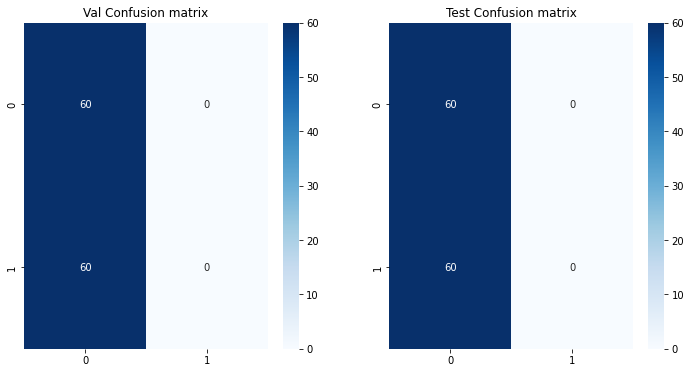

In [35]:
##第二次训练后的模型计分
test_2_final_model(model, train_generator, 
               val_generator, val2_generator, 
               train_label,
               test_label,
               val_label, 
               class_labels = ['idc-', 'idc+'])

In [41]:
print(model.predict_generator(val2_generator, steps=len(val2_generator)))

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


[[nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]
 [nan nan]

report of val data


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

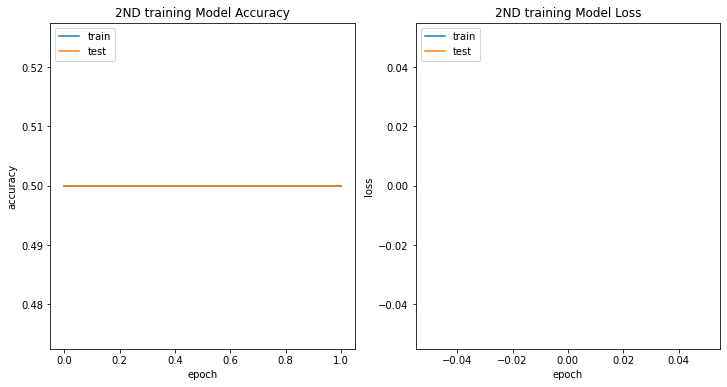

In [55]:
#显示第一次训练过程中accuracy和loss的变化
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
plt.subplot(121)
#plotting the Accuracy of test and training sets
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('2ND training Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
#plotting the loss of test and training sets
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('2ND training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#get_accuracy_metrics(model, X_train, y_train, X_val, y_val, X_test, y_test)

# analyse first model

In [51]:
model.load_weights(MODEL_PATH)

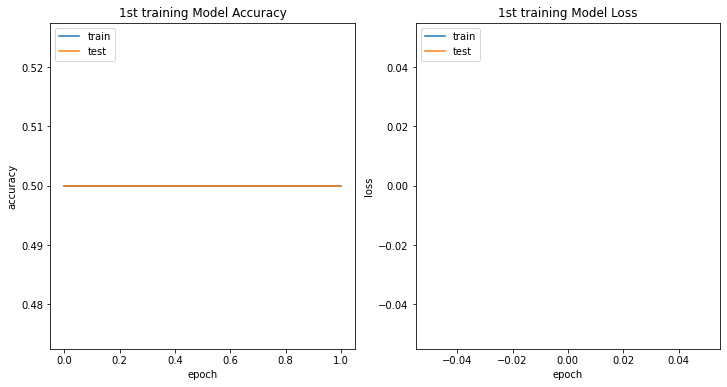

In [52]:
#显示第一次训练过程中accuracy和loss的变化
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
plt.subplot(121)
#plotting the Accuracy of test and training sets
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('1st training Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
#plotting the loss of test and training sets
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('1st training Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1.metrics_names

1/4 [======>.......................] - ETA: 0s

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


4/4 [==============================] - 0s 92ms/step
predicting test data
9/9 [==============================] - 1s 93ms/step
Train accuracy Score------------>
50.000 %
Val accuracy Score--------->
50.000 %
Test accuracy Score--------->
50.000 %
F1 Score--------------->
33.333 %
Cohen Kappa Score------------->
0.000 %
Recall-------------->
50.000 %
Precision-------------->
25.000 %


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


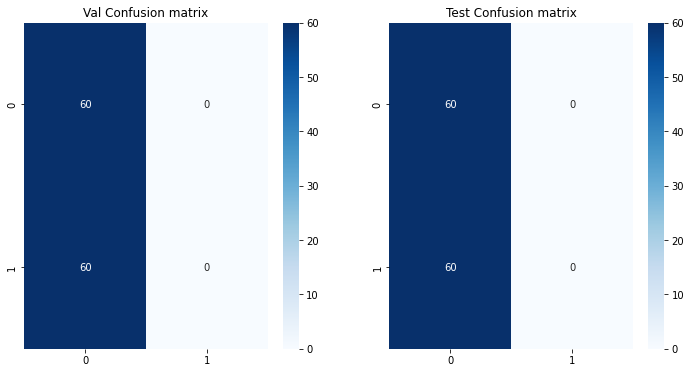

In [53]:
test_2_final_model(model, train_generator, 
               val_generator, val2_generator, 
               train_label,
               test_label,
               val_label, 
               class_labels = ['idc-', 'idc+'])

In [54]:

print("1st train: report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([val2_generator[i][1] for i in range(len(val2_generator))]),    
    model.predict_generator(val2_generator, steps=len(val2_generator)) 
)
print(report)

1st train: report of val data


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '
/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:4212: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
model.load_weights(MODEL_FT)

In [ ]:
print("report of val data")
report = sklearn.metrics.classification_report(
    np.concatenate([val2_generator[i][1] for i in range(len(val2_generator))]),    
    model.predict_generator(val2_generator, steps=len(val2_generator)) 
)
print(report)